# ディープラーニング
### 手書き数字の判読

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation

from sklearn.model_selection import train_test_split

from sklearn import datasets

%matplotlib inline
pd.options.display.max_columns = None

In [3]:
digits = datasets.load_digits()

In [4]:
Y = np.array(digits['target'])
X = np.array(digits['data'])

In [5]:
print(Y.shape)
print(X.shape)

(1797,)
(1797, 64)


In [6]:
# カテゴリー変数への展開
from tensorflow.keras.utils import to_categorical

Y = to_categorical(Y)

In [7]:
print(Y.shape)
print(X.shape)

(1797, 10)
(1797, 64)


## モデルの構築(全結合層)

In [8]:
# 説明変数の例
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

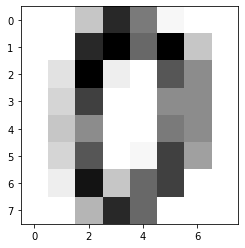

In [9]:
# 本来の姿
plt.imshow(X[0].reshape(8, 8), cmap='Greys')

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [11]:
print("Y_train=", Y_train.shape, ", X_train=", X_train.shape)
print("Y_valid=", Y_valid.shape, ", X_valid=", X_valid.shape)
print("Y_test=", Y_test.shape, ", X_test=", X_test.shape)

Y_train= (879, 10) , X_train= (879, 64)
Y_valid= (378, 10) , X_valid= (378, 64)
Y_test= (540, 10) , X_test= (540, 64)


In [12]:
model = keras.Sequential()

model.add(Dense(16, activation='relu', input_shape=(64,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = "rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

2022-03-22 01:03:48.852020: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-22 01:03:48.852064: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-22 01:03:48.852086: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-31-10-220): /proc/driver/nvidia/version does not exist
2022-03-22 01:03:48.852279: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-03-22 01:03:48.858960: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2300015000 Hz
2022-03-22 01:03:48.859232: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f3c84000b20 initialized for platform Host (this does not guarante

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 1,482
Trainable params: 1,482
Non-trainable params: 0
_________________________________________________________________


## 学習の実施(全結合層)

In [14]:
%%time
log = model.fit(X_train, Y_train, epochs=5000, batch_size=32, verbose=True,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                         min_delta=0, patience=100, 
                                                         verbose=1)],
         validation_data=(X_valid, Y_valid))

Epoch 1/5000
28/28 [==============================] - 0s 8ms/step - loss: 3.9083 - accuracy: 0.1490 - val_loss: 2.7703 - val_accuracy: 0.2381
Epoch 2/5000
28/28 [==============================] - 0s 2ms/step - loss: 2.2278 - accuracy: 0.3515 - val_loss: 1.9953 - val_accuracy: 0.3360
Epoch 3/5000
28/28 [==============================] - 0s 2ms/step - loss: 1.7080 - accuracy: 0.4551 - val_loss: 1.6195 - val_accuracy: 0.4630
Epoch 4/5000
28/28 [==============================] - 0s 2ms/step - loss: 1.3191 - accuracy: 0.5791 - val_loss: 1.3061 - val_accuracy: 0.5635
Epoch 5/5000
28/28 [==============================] - 0s 2ms/step - loss: 1.0253 - accuracy: 0.6769 - val_loss: 1.0371 - val_accuracy: 0.6693
Epoch 6/5000
28/28 [==============================] - 0s 2ms/step - loss: 0.8237 - accuracy: 0.7497 - val_loss: 0.9059 - val_accuracy: 0.6852
Epoch 7/5000
28/28 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.7918 - val_loss: 0.7608 - val_accuracy: 0.7381
Epoch 

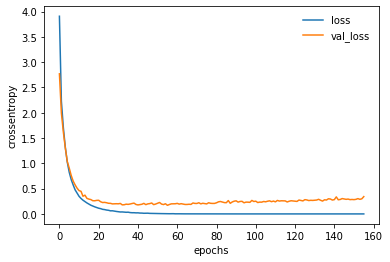

In [15]:
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) 
plt.xlabel("epochs")
plt.ylabel("crossentropy")
plt.show()

## テストデータによる評価(全結合層)

In [16]:
Y_pred = np.argmax(model.predict(X_test), axis=1)

In [17]:
# カテゴリー変数の復元
Y_test_ = np.argmax(Y_test, axis=1)

In [18]:
# モデルの評価
from sklearn.metrics import classification_report

print(classification_report(Y_test_, Y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       0.86      0.98      0.92        52
           2       0.98      0.92      0.95        53
           3       0.98      0.98      0.98        54
           4       0.98      0.98      0.98        48
           5       0.93      0.96      0.95        57
           6       0.97      0.98      0.98        60
           7       0.95      0.98      0.96        53
           8       0.92      0.92      0.92        61
           9       1.00      0.82      0.90        57

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540



## モデルの構築(CNN層)

In [19]:
# 8X8の画像の形状にreshape
X2 = X.reshape(len(X), 8, 8, 1)

In [55]:
print(X2.shape)

(1797, 8, 8, 1)


In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [57]:
print("Y_train=", Y_train.shape, ", X_train=", X_train.shape)
print("Y_valid=", Y_valid.shape, ", X_valid=", X_valid.shape)
print("Y_test=", Y_test.shape, ", X_test=", X_test.shape)

Y_train= (879, 10) , X_train= (879, 8, 8, 1)
Y_valid= (378, 10) , X_valid= (378, 8, 8, 1)
Y_test= (540, 10) , X_test= (540, 8, 8, 1)


In [58]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten

In [59]:
# モデルの初期化
model = keras.Sequential()

model.add(Conv2D(32, kernel_size=3, padding="same", strides=1,
    input_shape=(8, 8, 1,), activation="relu"))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = "rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 8, 8, 32)          320       
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                32784     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                170       
Total params: 33,274
Trainable params: 33,274
Non-trainable params: 0
_________________________________________________________________


## 学習の実施(CNN層)

In [ ]:
%%time
log = model.fit(X_train, Y_train, epochs=5000, batch_size=32, verbose=True,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                         min_delta=0, patience=100, 
                                                         verbose=1)],
         validation_data=(X_valid, Y_valid))

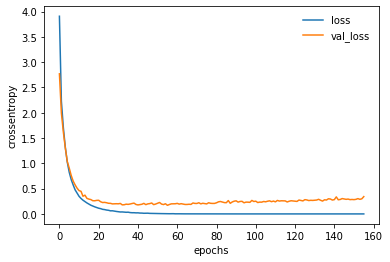

In [26]:
# グラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("crossentropy")
plt.show()

## テストデータによる評価(CNN層)

In [27]:
Y_pred = np.argmax(model.predict(X_test), axis=1)

In [28]:
# カテゴリー変数の復元
Y_test_ = np.argmax(Y_test, axis=1)

In [29]:
# モデルの評価
from sklearn.metrics import classification_report

print(classification_report(Y_test_, Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.00      0.00      0.00        52
           2       0.08      0.11      0.09        53
           3       0.10      0.07      0.08        54
           4       0.00      0.00      0.00        48
           5       0.26      0.75      0.38        57
           6       0.01      0.02      0.01        60
           7       0.00      0.00      0.00        53
           8       0.00      0.00      0.00        61
           9       0.00      0.00      0.00        57

    accuracy                           0.10       540
   macro avg       0.04      0.10      0.06       540
weighted avg       0.05      0.10      0.06       540



# 4.モデルの性能をあげよう！

In [40]:
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [41]:
# モデルの初期化
model = keras.Sequential()

# 入力層
model.add(Conv2D(
    64, kernel_size=3, padding="same",
    input_shape=(8, 8, 1,), activation="relu"
    ))
# プーリング層
model.add(MaxPooling2D(pool_size=(2, 2)))
# ドロップアウト層
model.add(Dropout(0.25))

# 層のユニットの繰り返し
model.add(Conv2D(128, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 1次元に変換
model.add(Flatten())
model.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001))) # 正則化
model.add(Dropout(0.5))

# 出力層
model.add(Dense(10, activation='softmax'))

# モデルの構築
model.compile(optimizer = "rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 8, 8, 32)          320       
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                32784     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                170       
Total params: 33,274
Trainable params: 33,274
Non-trainable params: 0
_________________________________________________________________


In [62]:
%%time
log = model.fit(X_train, Y_train, epochs=5000, batch_size=32, verbose=True,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                         min_delta=0, patience=100, 
                                                         verbose=1)],
         validation_data=(X_valid, Y_valid))

Epoch 1/5000
28/28 [==============================] - 0s 7ms/step - loss: 1.7035 - accuracy: 0.3766 - val_loss: 1.1090 - val_accuracy: 0.6508
Epoch 2/5000
28/28 [==============================] - 0s 3ms/step - loss: 0.9273 - accuracy: 0.7065 - val_loss: 0.7620 - val_accuracy: 0.7698
Epoch 3/5000
28/28 [==============================] - 0s 3ms/step - loss: 0.6191 - accuracy: 0.8259 - val_loss: 0.5987 - val_accuracy: 0.8016
Epoch 4/5000
28/28 [==============================] - 0s 3ms/step - loss: 0.4374 - accuracy: 0.8862 - val_loss: 0.4955 - val_accuracy: 0.8492
Epoch 5/5000
28/28 [==============================] - 0s 3ms/step - loss: 0.3297 - accuracy: 0.9147 - val_loss: 0.4113 - val_accuracy: 0.8651
Epoch 6/5000
28/28 [==============================] - 0s 3ms/step - loss: 0.2656 - accuracy: 0.9249 - val_loss: 0.3403 - val_accuracy: 0.8783
Epoch 7/5000
28/28 [==============================] - 0s 4ms/step - loss: 0.2054 - accuracy: 0.9465 - val_loss: 0.3790 - val_accuracy: 0.8598
Epoch 

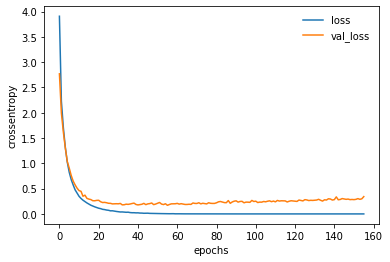

In [43]:
# グラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("crossentropy")
plt.show()

In [44]:
# 予測
Y_pred = np.argmax(model.predict(X_test), axis=1)

In [45]:
# カテゴリー変数の復元
Y_test_ = np.argmax(Y_test, axis=1)

In [46]:
# モデルの評価
from sklearn.metrics import classification_report

print(classification_report(Y_test_, Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.00      0.00      0.00        52
           2       0.00      0.00      0.00        53
           3       0.00      0.00      0.00        54
           4       0.00      0.00      0.00        48
           5       0.00      0.00      0.00        57
           6       0.00      0.00      0.00        60
           7       0.00      0.00      0.00        53
           8       0.00      0.00      0.00        61
           9       0.11      1.00      0.19        57

    accuracy                           0.11       540
   macro avg       0.01      0.10      0.02       540
weighted avg       0.01      0.11      0.02       540

